## La España en llamas.

- En este proyecto vamos a comprobar el impacto de los incendios forestales en España y los datos obtenidos a través de las corporaciones locales. 
- https://datos.civio.es/dataset/todos-los-incendios-forestales/#:~:text=La%20causalidad%20de%20los%20incendios,un%2018%25%20de%20los%20incendios.


Se va a aplicar el proceso CRISP-DM

## Fases:
- 1) Business Undeerstanding

## Elementos del CSV:

###Identificación de columnas.

* id:	Identificador del incendio.

* superficie:	Superficie forestal quemada en hectáreas.

* fecha:	Fecha de detección del incendio (formato yyyy-mm-dd).

* lat:	Latitud geográfica del origen del incendio.

* lng:	Longitud geográfica del origen del incendio.

* provincia:	Identificador de la provincia.

* municipio:	Nombre del municipio.

* muertos:	Número de muertos en el incendio.

* heridos:	Número de heridos en el incendio.

* time_ctrl:	Tiempo transcurrido hasta entrar en fase de control del incendio (en minutos).

* time_ext:	Tiempo transcurrido hasta la extinción del incendio (en minutos).

* personal:	Número de personas que han participado en la extinción del incendio (incluye técnicos, agentes forestales, brigadas, bomberos, voluntarios, guardias civiles y ejército).

* medios:	Número de medios terrestres y aéreos que han participado en la extinción del incendio (incluye autobombas, bulldozers, tractores, aviones y otros).

## Business Understanding

Se exponen los siguientes objetivos:
- Superficie total quemada por comunidades autónomas y la comunidad más quemada.
- Muertos / heridos por comunidad
- Comunidades que aportan mas personal y medios.

# 1. Exploración de Datos - EDA


# Importamos las librerías necesarias

In [4]:
# Código EDA
import pandas as pd
import folium as fl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files
from folium.plugins import MiniMap
from folium.plugins import FloatImage
import matplotlib.patches as mpatches

In [5]:
# Obtenemos los datos del CSV y les metemos en una variable

incendios = pd.read_csv("fires-all.csv", index_col= 0)

In [6]:
# Comprobamos las columnas del DataFrame

nombres_columnas = incendios.columns.values
nombres_columnas

array(['superficie', 'fecha', 'lat', 'lng', 'latlng_explicit',
       'idcomunidad', 'idprovincia', 'idmunicipio', 'municipio', 'causa',
       'causa_supuesta', 'causa_desc', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'gastos', 'perdidas'],
      dtype=object)

In [7]:
# Observamos los datos que hemos obtenido del CSV

#Para saber de que tipo son los datos vamos a manejar
incendios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82640 entries, 2001010001 to 2015510001
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   superficie       82640 non-null  float64
 1   fecha            82640 non-null  object 
 2   lat              82616 non-null  float64
 3   lng              82616 non-null  float64
 4   latlng_explicit  82640 non-null  int64  
 5   idcomunidad      82640 non-null  int64  
 6   idprovincia      82640 non-null  int64  
 7   idmunicipio      82640 non-null  int64  
 8   municipio        82640 non-null  object 
 9   causa            82640 non-null  int64  
 10  causa_supuesta   46465 non-null  float64
 11  causa_desc       82640 non-null  int64  
 12  muertos          2724 non-null   float64
 13  heridos          3071 non-null   float64
 14  time_ctrl        82640 non-null  int64  
 15  time_ext         82640 non-null  int64  
 16  personal         82640 non-null  int64  
 17

In [8]:
#Observamos el DataFrame
incendios

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,municipio,causa,causa_supuesta,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas
id,,,,,,,,,,,,,,,,,,,,
2001010001,3.70,2001-03-18,42.954656,-2.325719,1,1,1,13,BARRUNDIA,4,NaN,2,NaN,NaN,150,180,10,2,661.0,553.0
2001010004,1.50,2001-03-24,42.552183,-2.640673,1,1,1,41,NAVARIDAS,2,1.0,10,NaN,NaN,275,290,4,1,661.0,451.0
2001010005,1.50,2001-04-16,48.302507,-3.397798,1,1,1,33,LAPUEBLA DE LABARCA,2,NaN,10,NaN,NaN,135,165,4,1,312.0,902.0
2001010008,7.50,2001-05-25,42.946479,-2.485163,1,1,1,13,BARRUNDIA,4,NaN,2,NaN,NaN,335,410,6,1,1082.0,15338.0
2001010017,1.04,2001-07-20,43.091715,-3.024574,1,1,1,10,AIARA/AYALA,5,NaN,0,NaN,NaN,45,75,11,2,270.0,2866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015500092,1.01,2015-07-10,41.324187,-1.791716,1,10,50,38,ATECA,3,NaN,20,NaN,NaN,63,198,26,3,NaN,1.0
2015500116,11.20,2015-08-31,41.873662,-0.900144,1,10,50,298,ZUERA,1,NaN,0,NaN,NaN,110,455,49,5,NaN,21096.0
2015500121,1.11,2015-09-15,41.214308,0.249973,1,10,50,189,NONASPE,3,NaN,10,NaN,NaN,69,329,15,2,NaN,1.0


In [9]:
# Comprobamos las 5 últimas entradas del DataFrame

incendios.tail()

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,municipio,causa,causa_supuesta,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas
id,,,,,,,,,,,,,,,,,,,,
2015500092,1.01,2015-07-10,41.324187,-1.791716,1,10,50,38,ATECA,3,NaN,20,NaN,NaN,63,198,26,3,NaN,1.0
2015500116,11.20,2015-08-31,41.873662,-0.900144,1,10,50,298,ZUERA,1,NaN,0,NaN,NaN,110,455,49,5,NaN,21096.0
2015500121,1.11,2015-09-15,41.214308,0.249973,1,10,50,189,NONASPE,3,NaN,10,NaN,NaN,69,329,15,2,NaN,1.0
2015500126,1.28,2015-09-25,41.387613,-1.326090,1,10,50,24,ALMONACID DE LA SIERRA,5,NaN,0,NaN,NaN,51,211,19,4,NaN,1.0
2015510001,30.00,2015-10-05,35.899715,-5.361671,1,18,51,1,CEUTA,3,NaN,40,NaN,2.0,1710,2198,327,29,NaN,NaN


## 2. Manipulación de datos - Data Wrangling



In [10]:
# Código Data Wrangling

# En base a las hipótesis que nos hemos formulado, manipulamos los datos para obtener la información necesaria.

#En primer lugar, en idcomunidad, cambiamos los valores númericos en nombres de CCAA

incendios.loc[incendios['idcomunidad'] == 1, 'idcomunidad'] = 'Pais Vasco'
incendios.loc[incendios['idcomunidad'] == 2, 'idcomunidad'] = 'Cataluña'
incendios.loc[incendios['idcomunidad'] == 3, 'idcomunidad'] = 'Galicia'
incendios.loc[incendios['idcomunidad'] == 4, 'idcomunidad'] = 'Andalucía'
incendios.loc[incendios['idcomunidad'] == 5, 'idcomunidad'] = 'Asturias'
incendios.loc[incendios['idcomunidad'] == 6, 'idcomunidad'] = 'Cantabria'
incendios.loc[incendios['idcomunidad'] == 7, 'idcomunidad'] = 'La Rioja'
incendios.loc[incendios['idcomunidad'] == 8, 'idcomunidad'] = 'Murcia'
incendios.loc[incendios['idcomunidad'] == 9, 'idcomunidad'] = 'Comunidad Valenciana'
incendios.loc[incendios['idcomunidad'] == 10, 'idcomunidad'] = 'Aragón'
incendios.loc[incendios['idcomunidad'] == 11, 'idcomunidad'] = 'Castilla la Mancha'
incendios.loc[incendios['idcomunidad'] == 12, 'idcomunidad'] = 'Islas Canarias'
incendios.loc[incendios['idcomunidad'] == 13, 'idcomunidad'] = 'Navarra'
incendios.loc[incendios['idcomunidad'] == 14, 'idcomunidad'] = 'Extremadura'
incendios.loc[incendios['idcomunidad'] == 15, 'idcomunidad'] = 'Islas Baleares'
incendios.loc[incendios['idcomunidad'] == 16, 'idcomunidad'] = 'Madrid'
incendios.loc[incendios['idcomunidad'] == 17, 'idcomunidad'] = 'Castilla y León'
incendios.loc[incendios['idcomunidad'] == 18, 'idcomunidad'] = 'Ceuta'

In [11]:
# Realizamos una comprobación de que nos ha realizado el cambio
incendios

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,municipio,causa,causa_supuesta,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas
id,,,,,,,,,,,,,,,,,,,,
2001010001,3.70,2001-03-18,42.954656,-2.325719,1,Pais Vasco,1,13,BARRUNDIA,4,NaN,2,NaN,NaN,150,180,10,2,661.0,553.0
2001010004,1.50,2001-03-24,42.552183,-2.640673,1,Pais Vasco,1,41,NAVARIDAS,2,1.0,10,NaN,NaN,275,290,4,1,661.0,451.0
2001010005,1.50,2001-04-16,48.302507,-3.397798,1,Pais Vasco,1,33,LAPUEBLA DE LABARCA,2,NaN,10,NaN,NaN,135,165,4,1,312.0,902.0
2001010008,7.50,2001-05-25,42.946479,-2.485163,1,Pais Vasco,1,13,BARRUNDIA,4,NaN,2,NaN,NaN,335,410,6,1,1082.0,15338.0
2001010017,1.04,2001-07-20,43.091715,-3.024574,1,Pais Vasco,1,10,AIARA/AYALA,5,NaN,0,NaN,NaN,45,75,11,2,270.0,2866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015500092,1.01,2015-07-10,41.324187,-1.791716,1,Aragón,50,38,ATECA,3,NaN,20,NaN,NaN,63,198,26,3,NaN,1.0
2015500116,11.20,2015-08-31,41.873662,-0.900144,1,Aragón,50,298,ZUERA,1,NaN,0,NaN,NaN,110,455,49,5,NaN,21096.0
2015500121,1.11,2015-09-15,41.214308,0.249973,1,Aragón,50,189,NONASPE,3,NaN,10,NaN,NaN,69,329,15,2,NaN,1.0


In [12]:
#Eliminamos columnas innecesarias del dataset
incendios2 = incendios.drop(columns = ["idprovincia","latlng_explicit","idmunicipio","causa","causa_desc","causa_supuesta","gastos","perdidas"])
incendios2

,superficie,fecha,lat,lng,idcomunidad,municipio,muertos,heridos,time_ctrl,time_ext,personal,medios
id,,,,,,,,,,,,
2001010001,3.70,2001-03-18,42.954656,-2.325719,Pais Vasco,BARRUNDIA,NaN,NaN,150,180,10,2
2001010004,1.50,2001-03-24,42.552183,-2.640673,Pais Vasco,NAVARIDAS,NaN,NaN,275,290,4,1
2001010005,1.50,2001-04-16,48.302507,-3.397798,Pais Vasco,LAPUEBLA DE LABARCA,NaN,NaN,135,165,4,1
2001010008,7.50,2001-05-25,42.946479,-2.485163,Pais Vasco,BARRUNDIA,NaN,NaN,335,410,6,1
2001010017,1.04,2001-07-20,43.091715,-3.024574,Pais Vasco,AIARA/AYALA,NaN,NaN,45,75,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2015500092,1.01,2015-07-10,41.324187,-1.791716,Aragón,ATECA,NaN,NaN,63,198,26,3
2015500116,11.20,2015-08-31,41.873662,-0.900144,Aragón,ZUERA,NaN,NaN,110,455,49,5
2015500121,1.11,2015-09-15,41.214308,0.249973,Aragón,NONASPE,NaN,NaN,69,329,15,2


In [13]:
# #Convertirmos lo NaN a '0'
incendios2.fillna(0, inplace=True)

In [14]:
# Observamos los cambios del DataFrame

incendios2

,superficie,fecha,lat,lng,idcomunidad,municipio,muertos,heridos,time_ctrl,time_ext,personal,medios
id,,,,,,,,,,,,
2001010001,3.70,2001-03-18,42.954656,-2.325719,Pais Vasco,BARRUNDIA,0.0,0.0,150,180,10,2
2001010004,1.50,2001-03-24,42.552183,-2.640673,Pais Vasco,NAVARIDAS,0.0,0.0,275,290,4,1
2001010005,1.50,2001-04-16,48.302507,-3.397798,Pais Vasco,LAPUEBLA DE LABARCA,0.0,0.0,135,165,4,1
2001010008,7.50,2001-05-25,42.946479,-2.485163,Pais Vasco,BARRUNDIA,0.0,0.0,335,410,6,1
2001010017,1.04,2001-07-20,43.091715,-3.024574,Pais Vasco,AIARA/AYALA,0.0,0.0,45,75,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2015500092,1.01,2015-07-10,41.324187,-1.791716,Aragón,ATECA,0.0,0.0,63,198,26,3
2015500116,11.20,2015-08-31,41.873662,-0.900144,Aragón,ZUERA,0.0,0.0,110,455,49,5
2015500121,1.11,2015-09-15,41.214308,0.249973,Aragón,NONASPE,0.0,0.0,69,329,15,2


In [15]:
#Guardamos los datos en un CSV
incendios2.to_csv("incendios.csv")

# Con files.download('.csv'), descargamos directamente el CSV que hemos creado.

# para utilizarlo quitar la '#'
# files.download('incendios.csv')

## 3. Desarrollo de objetivos

In [16]:
# Objetivo1

# Superficie quemada total por comunidades
 
superficieQuemadaPorComunidad = incendios2.groupby(['idcomunidad'], as_index=False)['superficie'].sum().sort_values("superficie", ascending = False).reset_index(drop=True)
superficieQuemadaPorComunidad

,idcomunidad,superficie
0,Galicia,367315.55
1,Castilla y León,306575.12
2,Andalucía,164130.65
3,Extremadura,152290.43
4,Asturias,139140.59
5,Cantabria,105086.57
6,Comunidad Valenciana,99086.43
7,Castilla la Mancha,95023.28
8,Islas Canarias,57595.90
9,Aragón,55093.34


In [17]:
# La superficie con mayores hectáreas quemadas es: 

superficieQuemadaPorComunidad.head(1)

,idcomunidad,superficie
0,Galicia,367315.55


In [18]:
# Objetivo2

# Comprobamos los muertos por comunidades autónomas.

muertos = incendios2.groupby(["idcomunidad"], as_index = False)["muertos"].max().sort_values("muertos", ascending = False).reset_index(drop = True)
muertos

,idcomunidad,muertos
0,Castilla la Mancha,11.0
1,Aragón,6.0
2,Cataluña,5.0
3,Galicia,2.0
4,Comunidad Valenciana,2.0
5,Andalucía,1.0
6,Extremadura,1.0
7,Castilla y León,1.0
8,Asturias,1.0
9,Ceuta,0.0


In [19]:
#Los heridos por comunidades autónomas.

heridos = incendios2.groupby(["idcomunidad"], as_index = False)["heridos"].sum().sort_values("heridos", ascending = False).reset_index(drop = True)
heridos

,idcomunidad,heridos
0,Castilla y León,157.0
1,Andalucía,123.0
2,Galicia,67.0
3,Madrid,51.0
4,Cataluña,32.0
5,Castilla la Mancha,29.0
6,Extremadura,26.0
7,Asturias,25.0
8,Aragón,23.0
9,Islas Canarias,16.0


In [20]:
# Objetivo3

#Comunidades que aportan mas personal

personasPorComunidad = incendios2.groupby(["idcomunidad"], as_index=False)["personal"].max().sort_values("personal", ascending = False).reset_index(drop=True)
personasPorComunidad

,idcomunidad,personal
0,Comunidad Valenciana,3979
1,Extremadura,3414
2,Andalucía,1869
3,Cataluña,1695
4,Madrid,1288
5,Islas Canarias,1137
6,Castilla la Mancha,1045
7,Islas Baleares,1029
8,Aragón,951
9,Castilla y León,876


In [21]:
# Medios que aporta cada comunidad

mediosPorComunidad = incendios2.groupby(["idcomunidad"], as_index=False)["medios"].max().sort_values("medios", ascending = False).reset_index(drop=True)
mediosPorComunidad

,idcomunidad,medios
0,Extremadura,310
1,Comunidad Valenciana,239
2,Galicia,205
3,Cataluña,171
4,Castilla y León,129
5,Aragón,127
6,Andalucía,126
7,Castilla la Mancha,110
8,Navarra,94
9,Islas Canarias,85


## 4. Gráficos

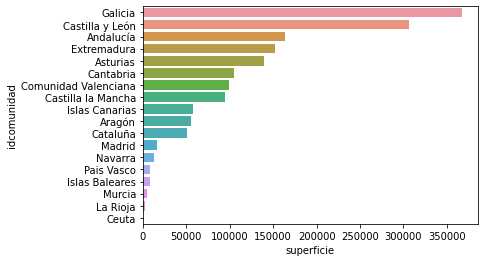

In [22]:
# Histograma de la superficie más quemada

sns.barplot(x=superficieQuemadaPorComunidad.superficie, y=superficieQuemadaPorComunidad.idcomunidad, orient='h');

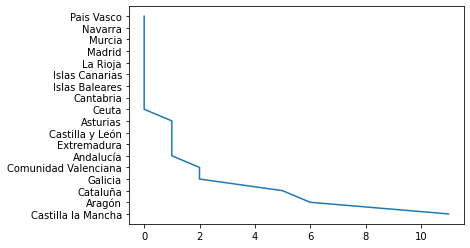

In [24]:
# Muertos por comunidad autónoma
plt.plot(muertos.muertos, muertos.idcomunidad)
# plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='heridos', ylabel='idcomunidad'>

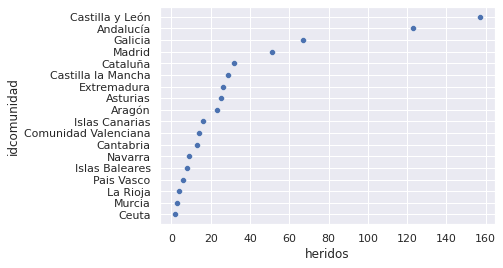

In [65]:
# Heridos por comunidad autónoma
sns.scatterplot( x=heridos.heridos, y=heridos.idcomunidad);

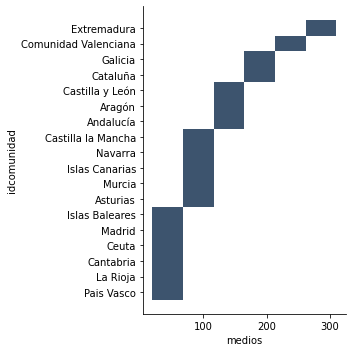

In [29]:
# Medios por comunidad
sns.displot( x=mediosPorComunidad.medios, y= mediosPorComunidad.idcomunidad)
plt.show()

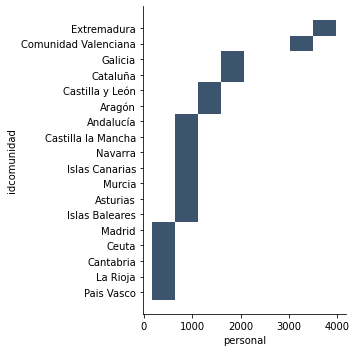

In [32]:
# personal por comunidad
sns.displot( x=personasPorComunidad.personal, y= mediosPorComunidad.idcomunidad)
plt.show()

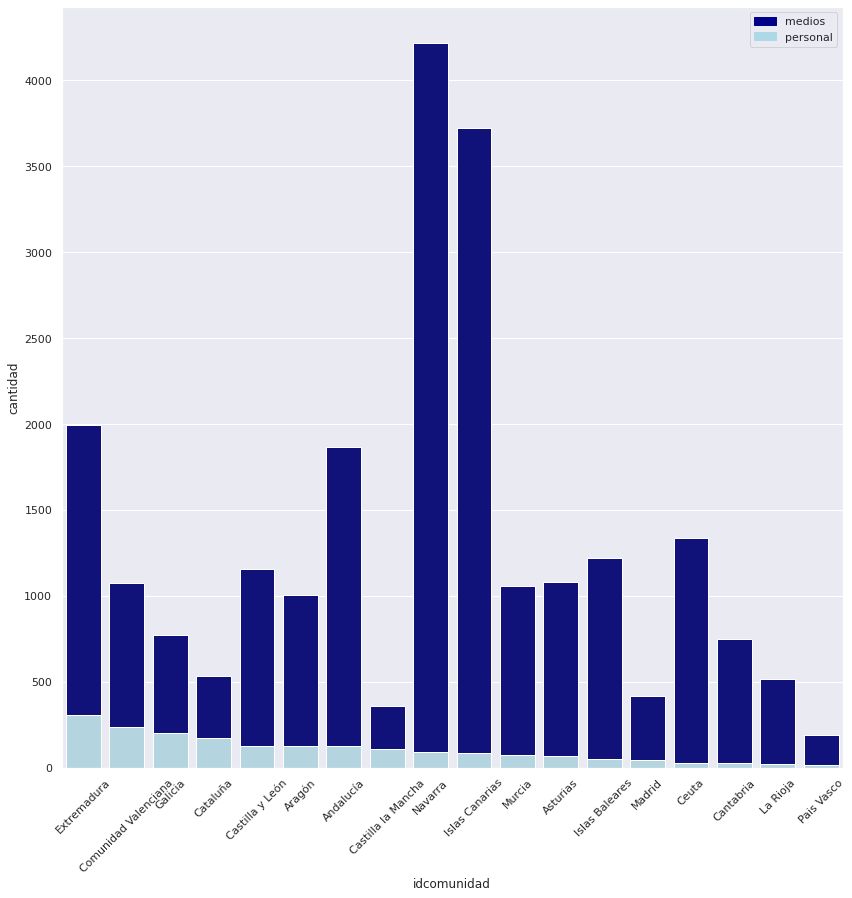

In [58]:
#Creamos una máscara para cada DataFrame
mediosPorComunidad['rubro'] = 1
personasPorComunidad['rubro'] = 2
# Cambiamos el nombre de las columnas para hacer que coincidan
mediosPorComunidad.rename(columns={'medios':'cantidad'}, inplace = True )
personasPorComunidad.rename(columns={'personal':'cantidad'}, inplace = True)
# Concatenamos
df_total = pd.concat([personasPorComunidad,mediosPorComunidad])

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Seleccionamos el tamaño de la figura
plt.figure(figsize=(14, 14))

#Creamos un nuevo DataFrame donde sumamos los medios y personal

df2 = df_total.groupby('idcomunidad')['cantidad'].sum().reset_index()

# bar1 es la variable donde seleccionamos la columna que queremos en cada eje
bar1 = sns.barplot(x="idcomunidad",  y="cantidad", data=df2, color='darkblue')

# Creamos un nuevo DataFrame seleccionando nuestra mácara con rubro=1 
nuevo_df = df_total[df_total['rubro'] == 1]

# bar2 es la variable donde seleccionamos la columna que queremos en cada eje, teniendo especial cuidado en el eje Y, ya que tiene que coincidir con bar1

bar2 = sns.barplot(x="idcomunidad", y="cantidad", data=nuevo_df, estimator=sum, ci=None,  color='lightblue')

# Añadimos la leyenda
top_bar = mpatches.Patch(color='darkblue', label='personal')
bottom_bar = mpatches.Patch(color='lightblue', label='medios')
plt.legend(handles=[top_bar, bottom_bar])

# Mostramos el gráfico
# Rotamos 45º la los nombres del eje X
plt.xticks(rotation=45)
# Mostramos el gráfico
plt.show()

In [59]:
df_new = incendios2[['idcomunidad', 'superficie', 'lat', 'lng']]
df_max = pd.DataFrame(df_new.groupby(['idcomunidad'])['superficie'].max())
mayorIncendio = df_max.merge(df_new, how = 'inner', on = ['superficie', 'idcomunidad'])
mayorIncendio
mapaIncendios = fl.Map(location=[43.46472, -3.80444], zoom_start=4)



for (index, row) in mayorIncendio.iterrows():
    fl.Marker(location = [row.loc["lat"], row.loc["lng"]],
    popup = row.loc["idcomunidad"],
    tooltip = "click").add_to(mapaIncendios)


    
# display map    
mapaIncendios